# Unsupervised learning with K-Means for mall customer data segmentation.

Unsupervised learning refers to the machine learning algorithm that infers from data that is not labelled. It learns or studies the patterns in the data on it's own. K-means is a popular unsupervised learning algorithm that separates n observations into k clusters in which each observation belongs to the cluster with the nearest mean. Firstly, import all necessary modules.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Now lets look at some basic details the dataset can tell us like the dimensions and count/mean etc of the various features in the dataset. Also lets rename the 2 columns with long names into ones we can easily access.

In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.rename(columns={'Spending Score (1-100)':'SpendingScore','Annual Income (k$)':'AnnualIncome'},inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Visualization

Plot some basic graphs with the help of matplotlib library and seaborn. 
The countplot gives us an idea of how many examples are present in a given group in categorical data and here it is gender.

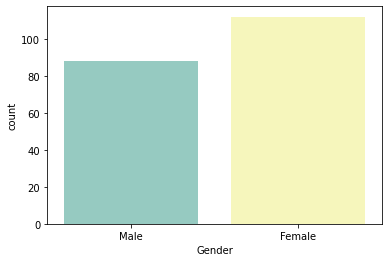

In [6]:
sns.countplot(data=df,x='Gender',palette='Set3')

Now lets look at the distplot(histogram) which gives the range of the different features;age, income and the spending score

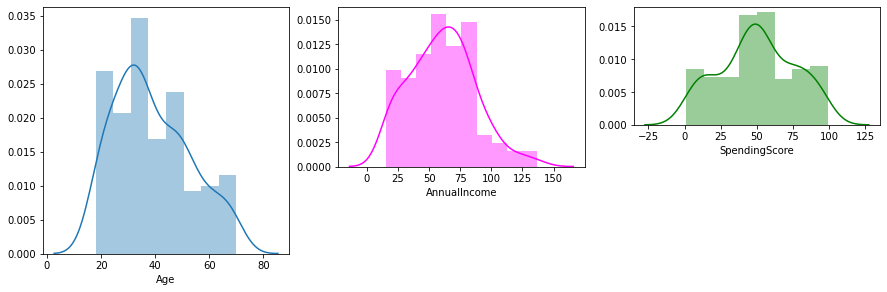

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.distplot(df['Age'])
plt.subplot(3,3,2)
sns.distplot(df['AnnualIncome'],color='magenta')
plt.subplot(4,3,3)
sns.distplot(df['SpendingScore'],color='green')

Now, a heatmap shows the two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors and the relation between each of them is shown in the matrix. It helps us analyze the relationship between different features in our dataset.

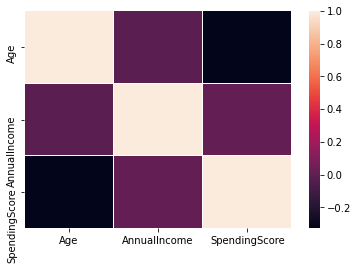

In [8]:
sns.heatmap(df.iloc[:,1:5].corr(),annot=False,linewidths=0.2)

The simple lineplot is created between 2 variables, with respect to gender.

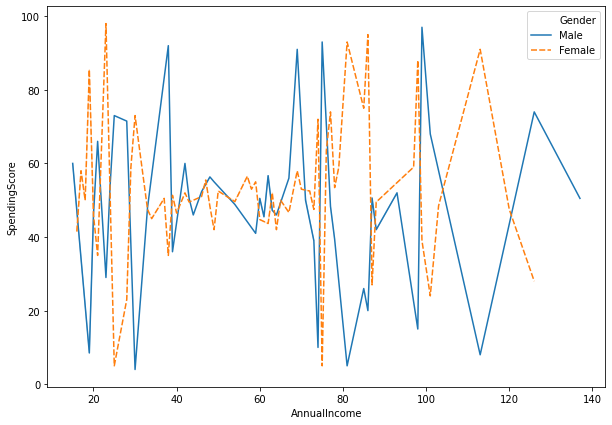

In [9]:
plt.figure(figsize=(10,7))
sns.lineplot(x='AnnualIncome',y='SpendingScore',hue='Gender',data=df,ci=True,style='Gender',markers=False)

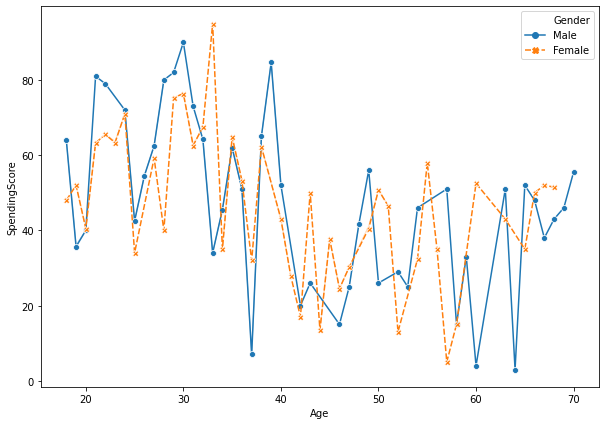

In [10]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Age',y='SpendingScore',hue='Gender',data=df,ci=False,style='Gender',markers=True)

A boxplot can also be used to visualize distributions.

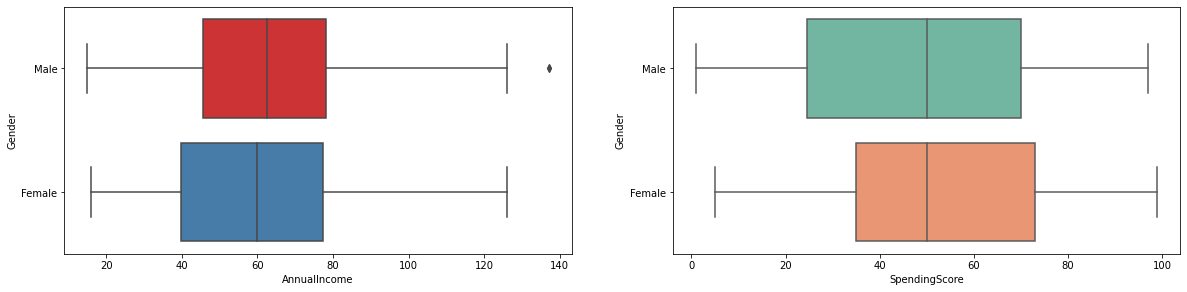

In [11]:
plt.figure(figsize=(20,10))
x=0
for i in ['AnnualIncome','SpendingScore']:
    x=x+1
    plt.subplot(2,2,x)
    sns.boxplot(data=df,x=i,y='Gender',palette='Set'+str(x))
plt.show()

The next few steps are to check if all the values in the dataset are non-null and contain proper numerical values

In [12]:
lenc=LabelEncoder()
df['Gender']=lenc.fit_transform(df['Gender'])

In [13]:
df.isna().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [14]:
df.drop('CustomerID',axis=1,inplace=True)

In [15]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# K-Means

First, lets check the elbow curve for different number of clusters using a forloop to append the values of inertia of the K-means algorithm into a list and plotting them for a range of 1-10 clusters.
K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. Inertia tells us how far away the points within a cluster are.
The value of inertia decreases as the number of clusters increase. 
The elbow point is the point in the graph when we notice a bend in the curve.

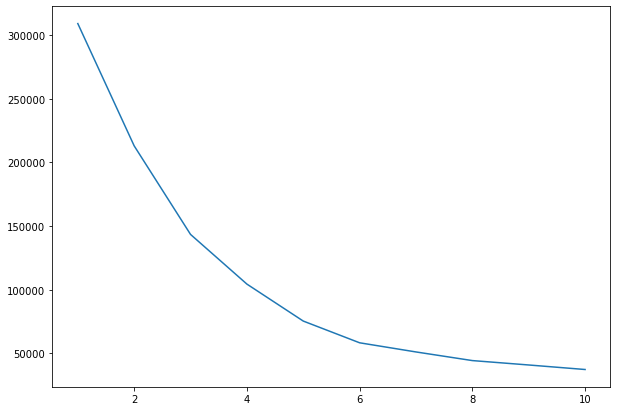

In [16]:
cluster=list()
for i in range(1,11):
    kmns=KMeans(n_clusters=i)
    kmns.fit(df)
    cluster.append(kmns.inertia_)
plt.figure(figsize=(10,7))
sns.lineplot(x=list(range(1,11)),y=cluster)

We notice 2 potential elbow points or "bends" i.e. one at approximately 3 and another at around 5. Thus we run K-means at both those points to form the requires clusters which we'll visualize eventually.

# 3 clusters

In [17]:
n=3
kmeans3=KMeans(n_clusters=n,n_init=10,max_iter=500)
kmeans3.fit(df)

KMeans(max_iter=500, n_clusters=3)

In [18]:
df['clusters']=kmeans3.labels_
kmeans3.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829]])

In [19]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore,clusters
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2


The silhouette score is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample.The values of this score range from -1 to 1. Values almost equal to 0 indicate overlapping clusters. Values closer to 1 indicate the best possible clustering while negative values generally indicate that a sample has been assigned to the wrong cluster.

In [20]:
print(silhouette_score(df.iloc[:,0:4],kmeans3.labels_))

0.383798873822341


In the plot below, we can clearly notice 3 clusters distinguished by color. Thus K-means has performed its job and assigned proper clusters to the data points.

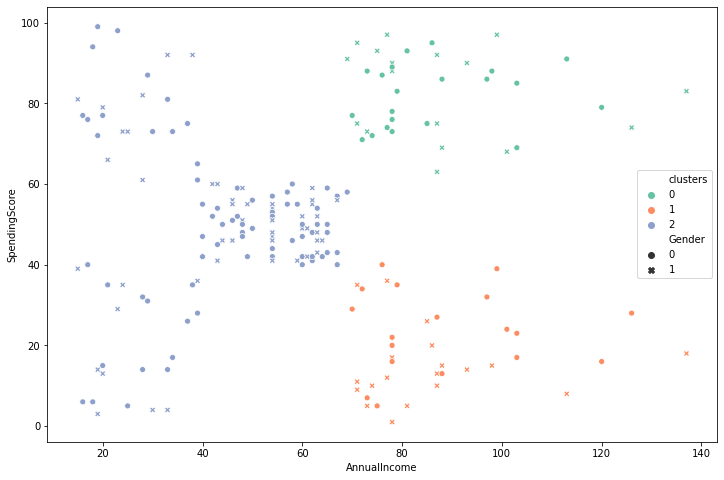

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['AnnualIncome'], df['SpendingScore'], hue=df['clusters'], palette='Set2',style=df['Gender'])

# 5 clusters

In [22]:
n=5
kmeans5=KMeans(n_clusters=n,n_init=10,max_iter=500)
kmeans5.fit(df)

KMeans(max_iter=500, n_clusters=5)

In [23]:
df['clusters']=kmeans5.labels_
kmeans5.cluster_centers_

array([[ 5.13513514e-01,  4.03243243e+01,  8.74324324e+01,
         1.81891892e+01,  1.00000000e+00],
       [ 4.61538462e-01,  3.26923077e+01,  8.65384615e+01,
         8.21282051e+01, -1.11022302e-15],
       [ 4.17721519e-01,  4.31265823e+01,  5.48227848e+01,
         4.98354430e+01,  1.98734177e+00],
       [ 3.91304348e-01,  4.52173913e+01,  2.63043478e+01,
         2.09130435e+01,  2.00000000e+00],
       [ 4.09090909e-01,  2.52727273e+01,  2.57272727e+01,
         7.93636364e+01,  2.00000000e+00]])

In [24]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore,clusters
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


In [25]:
print(silhouette_score(df.iloc[:,0:4],kmeans5.labels_))

0.44424291275274114


We see and improvement in the silhouette score. Thus, plotting the clusters, we can distinguish the 5 groups.

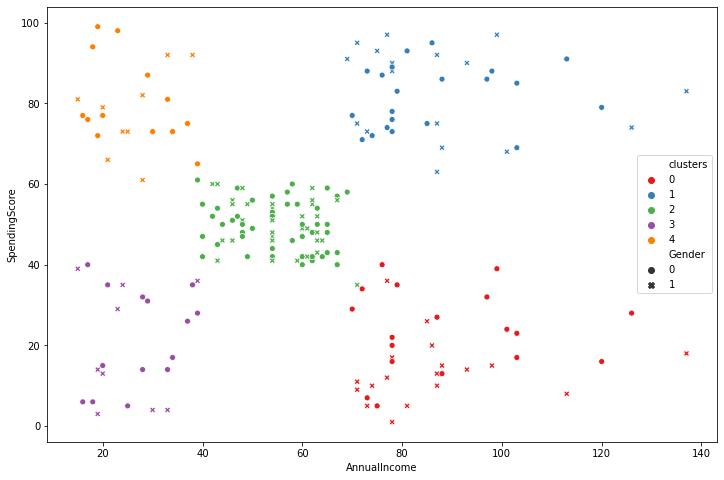

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['AnnualIncome'], df['SpendingScore'], hue=df['clusters'], palette='Set1',style=df['Gender'])